In [2]:
%pwd

u'C:\\Users\\Vladimir Alencar'

In [3]:
%cd C:\Users\Vladimir Alencar\Desktop\python\pydata-book-master\pydata-book-master\ch02
    

C:\Users\Vladimir Alencar\Desktop\python\pydata-book-master\pydata-book-master\ch02


In [4]:
%pwd

u'C:\\Users\\Vladimir Alencar\\Desktop\\python\\pydata-book-master\\pydata-book-master\\ch02'

In [5]:
path = 'C:\\Users\\Vladimir Alencar\\Desktop\\python\\pydata-book-master\\pydata-book-master\\ch02\\usagov_bitly_data2012-03-16-1331923249.txt'

In [6]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [7]:


import json
path = 'C:\\Users\\Vladimir Alencar\\Desktop\\python\\pydata-book-master\\pydata-book-master\\ch02\\usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [8]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [9]:
records[0]['ll']

[42.576698, -70.954903]

In [10]:

records[0]['tz']

u'America/New_York'

In [11]:
import json
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [12]:
len(time_zones)

3440

In [13]:

def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [14]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [15]:
counts = get_counts(time_zones)

In [16]:
len(counts)

97

In [17]:
counts['America/New_York']

1251

In [18]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [19]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [20]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(15)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33),
 (u'Europe/Berlin', 28),
 (u'Europe/Rome', 27),
 (u'America/Rainy_River', 25),
 (u'Europe/Amsterdam', 22),
 (u'America/Phoenix', 20)]

In [21]:

%matplotlib inline

In [22]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

In [23]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)
frame[:][:2]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php


In [24]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 333.8+ KB


In [25]:

frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [26]:

tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [27]:
clean_tz = frame['tz'].fillna('Missing')


In [28]:

clean_tz[clean_tz == ''] = 'Unknown'

In [29]:
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                   Unknown
8                   Unknown
9                   Unknown
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                  Missing
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                  Unknown
29                  Unknown
               ...         
3530    America/Los_Angeles
3531                Unknown
3532       America/New_York
3533       America/New_York
3534        America/

In [30]:

tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

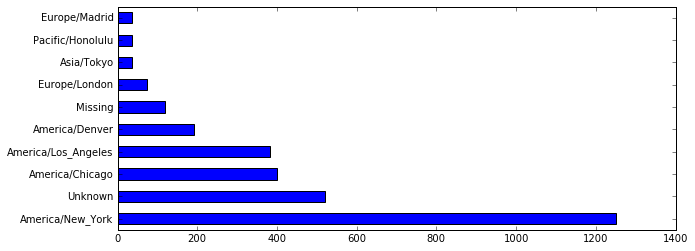

In [31]:
plt.figure(figsize=(10, 4))
tz_counts[:10].plot(kind='barh', rot=0)
# plt.show()


In [32]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [33]:
frame[:][:2]


,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php


In [34]:

results = Series([x.split()[0] for x in frame.a.dropna()])
results[:10]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

In [35]:
len(results)

3440

In [36]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [37]:
cframe = frame[frame.a.notnull()]

In [38]:
cframe[:][:2]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php


In [39]:
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [40]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [41]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:15]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [42]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [43]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset[:][:2]


,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19


In [44]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


In [45]:
plt.figure()

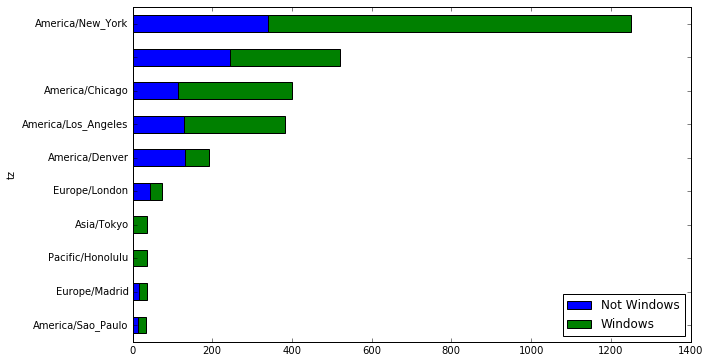

In [46]:
count_subset.plot(kind='barh', stacked=True)

In [47]:
plt.figure()

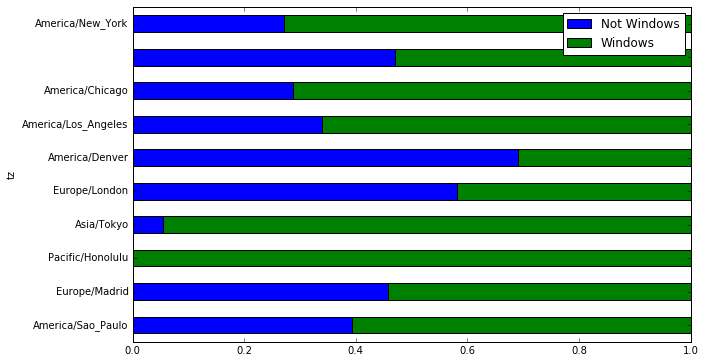

In [48]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

In [49]:
# Movies

In [50]:
# MovieLens 1M data set

In [51]:
import pandas as pd
import os
encoding = 'latin1'
path = 'C:\\Users\\Vladimir Alencar\\Desktop\\python\\pydata-book-master\\pydata-book-master\\ch02'
upath = os.path.expanduser(path + '\\movielens\\users.dat')
rpath = os.path.expanduser(path + '\\movielens\\ratings.dat')
mpath = os.path.expanduser(path + '\\movielens\\movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


In [52]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [53]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [54]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [55]:
data = pd.merge(pd.merge(ratings, users), movies)
data[:][:2]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama


In [56]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [57]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns=('gender'), aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [58]:
age_ratings = data.pivot_table('rating', index='title',
                                columns=('age'), aggfunc='mean')
age_ratings[:6]

age,1,18,25,35,45,50,56
title,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN
'Night Mother (1986),2.0,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.5,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.5,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.0,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571
1-900 (1994),NaN,NaN,2.000000,NaN,NaN,NaN,3.000000


In [59]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:-10]

title
$1,000,000 Duck (1971)                              37
'Night Mother (1986)                                70
'Til There Was You (1997)                           52
'burbs, The (1989)                                 303
...And Justice for All (1979)                      199
1-900 (1994)                                         2
10 Things I Hate About You (1999)                  700
101 Dalmatians (1961)                              565
101 Dalmatians (1996)                              364
12 Angry Men (1957)                                616
13th Warrior, The (1999)                           750
187 (1997)                                          55
2 Days in the Valley (1996)                        286
20 Dates (1998)                                    139
20,000 Leagues Under the Sea (1954)                575
200 Cigarettes (1999)                              181
2001: A Space Odyssey (1968)                      1716
2010 (1984)                                        470
24 7

In [60]:
ratings_by_age = data.groupby('age').size()
ratings_by_age[:10]

age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
dtype: int64

In [61]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles[:10]

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)'],
      dtype='object', name=u'title')

In [62]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [63]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [64]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [65]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [66]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [67]:

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [68]:
mean_ratings[:10]

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
"13th Warrior, The (1999)",3.112000,3.168000,0.056000
2 Days in the Valley (1996),3.488889,3.244813,-0.244076
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,0.039102
2001: A Space Odyssey (1968),3.825581,4.129738,0.304156


In [69]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [70]:

# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [71]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.ix[active_titles]
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [72]:
# US Baby Names 1880-2010

In [73]:
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

u'C:\\Users\\Vladimir Alencar\\Desktop\\python\\pydata-book-master\\pydata-book-master\\ch02'

In [74]:
%type ch02/names/yob1880.txt

ERROR: Line magic function `%type` not found.


In [75]:
import pandas as pd
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [76]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [77]:
# 2010 is the last available year right now
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [78]:
names[:][:-10]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [79]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [80]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


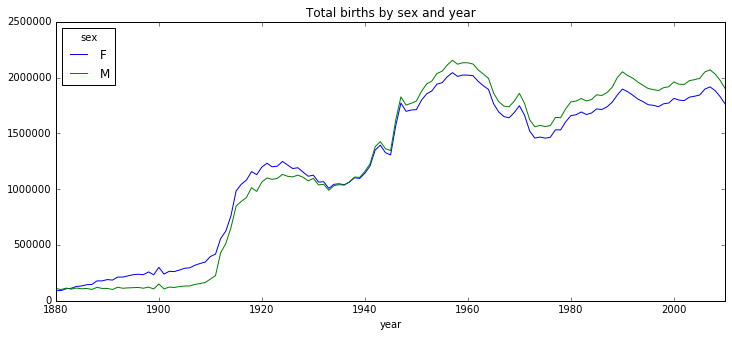

In [81]:
total_births.plot(title='Total births by sex and year')

In [82]:

def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)

    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [83]:

names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [84]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [85]:

def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [86]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [87]:

pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [88]:
top1000.index = np.arange(len(top1000))

In [89]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [90]:
# Analyzing naming trends

In [91]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [92]:
girls[:-10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [93]:

total_births = top1000.pivot_table('births', index='year', columns='name',
                                   aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,71,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,81,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,80,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,79,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,98,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,88,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,84,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,104,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,137,...,11,42,NaN,NaN,23,7,30,42,45,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x150C5BD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x31F23B90>], dtype=object)

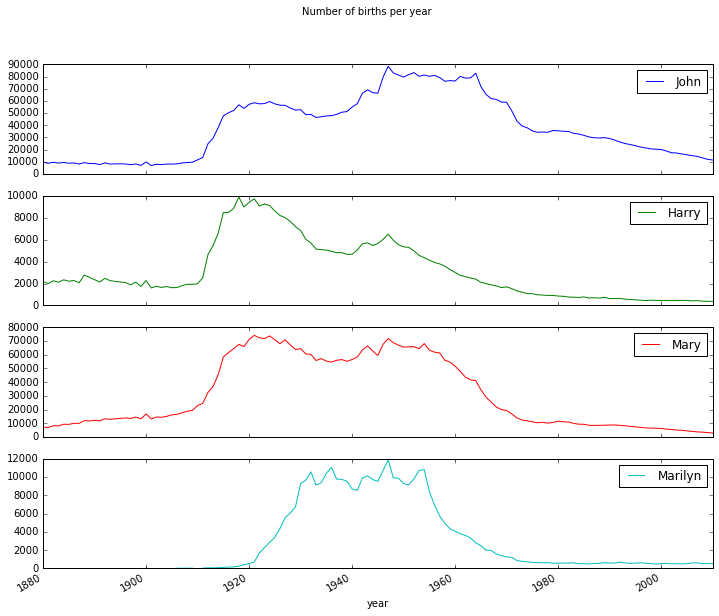

In [94]:

subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

In [95]:
plt.figure()

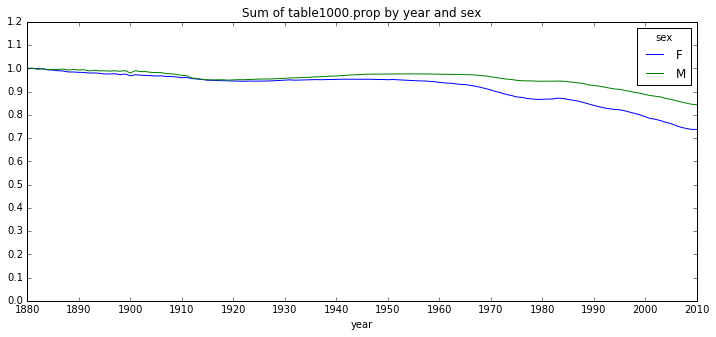

In [96]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [97]:
df = boys[boys.year == 2010]
df[:10]

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [98]:
dg = girls[girls.year == 2010]
dg
dg.sort_values(by='births', ascending=False)[:30]

,name,sex,births,year,prop
259877,Isabella,F,22731,2010,0.012923
259878,Sophia,F,20477,2010,0.011641
259879,Emma,F,17179,2010,0.009766
259880,Olivia,F,16860,2010,0.009585
259881,Ava,F,15300,2010,0.008698
259882,Emily,F,14172,2010,0.008057
259883,Abigail,F,14124,2010,0.008030
259884,Madison,F,13070,2010,0.007430
259885,Chloe,F,11656,2010,0.006626
259886,Mia,F,10541,2010,0.005993


In [99]:
dg = girls[girls.year == 2010]

dg[dg.name == 'Isabella']

,name,sex,births,year,prop
259877,Isabella,F,22731,2010,0.012923


In [100]:
dg[dg.name == 'Laura'].births

260151    1193
Name: births, dtype: int64

In [101]:
dg[dg.name == 'Laura']

,name,sex,births,year,prop
260151,Laura,F,1193,2010,0.000678


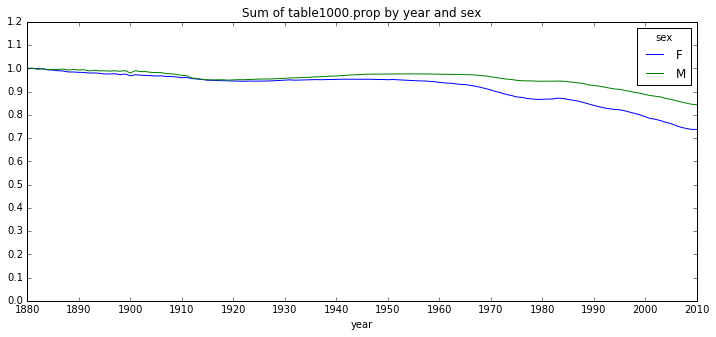

In [102]:
plt.figure()
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [104]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [105]:
prop_cumsum.values.searchsorted(0.5)

116

In [106]:
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


25

In [107]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [108]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


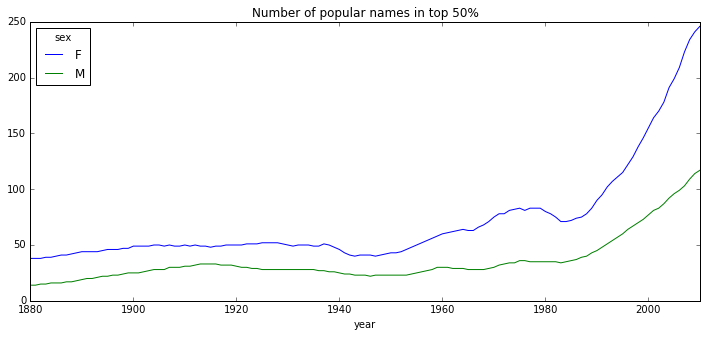

In [109]:
diversity.plot(title="Number of popular names in top 50%")

In [ ]:
# The "Last letter" Revolution

In [110]:

# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [111]:

subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108376  691247  670605    977    5204   28438
b               NaN     694     450    411    3912   38859
c                 5      49     946    482   15476   23125
d              6750    3729    2607  22111  262112   44398
e            133569  435013  313833  28655  178823  129012

In [112]:

subtable.sum()

sex  year
F    1910     396416
     1960    2022062
     2010    1759010
M    1910     194198
     1960    2132588
     2010    1898382
dtype: float64

In [113]:
letter_prop = subtable / subtable.sum().astype(float)

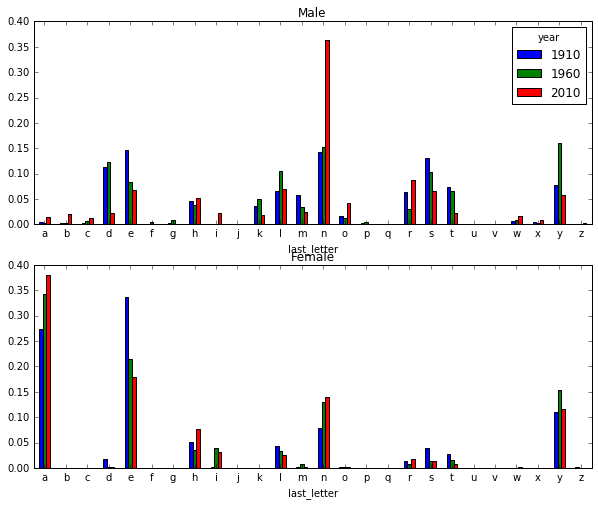

In [114]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [115]:
plt.subplots_adjust(hspace=0.25)

In [ ]:
# Boy names that became girl names (and vice versa)

In [116]:

all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [117]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [118]:

table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1,NaN
2007,1,NaN
2008,1,NaN
2009,1,NaN
2010,1,NaN


In [119]:
plt.close('all')

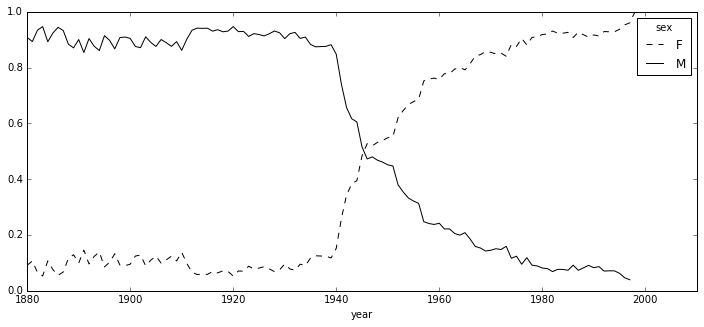

In [120]:
table.plot(style={'M': 'k-', 'F': 'k--'})